# Análisis Exploratorio de Datos (EDA) - HR Data

Este notebook realiza un análisis exploratorio completo sobre el archivo `HR_Data_MNC_Data Science Lovers.csv` para el área de Recursos Humanos. Incluye inspección de columnas, tipos, nulos, duplicados, estadísticos, outliers, correlaciones y visualizaciones básicas. Todo el análisis y los comentarios están en español para facilitar la comprensión del equipo de RRHH.

## 1. Importar bibliotecas necesarias

Importamos las librerías principales para análisis y visualización de datos.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de gráficos en Jupyter
%matplotlib inline
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Opcional: mostrar todas las columnas
pd.set_option('display.max_columns', None)

## 2. Cargar y explorar el conjunto de datos

Leemos el archivo CSV original y mostramos las primeras filas para entender la estructura de los datos.

In [5]:
# Ruta al archivo de datos limpio
data_path = r'H:/git/RR-HH/TalentPulse/Data/processed/clean_hr.csv'

# Cargar el dataset limpio
df = pd.read_csv(data_path)

# Mostrar las primeras filas
df.head()

,unnamed:_0,id_empleado,nombre_completo,departamento,puesto,fecha_contratacion,ubicacion,calificacion_desempeno,anios_experiencia,estatus,modalidad_trabajo,salario_inr
0,0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363
1,1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686
2,2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084
3,3,EMP0000004,Nicholas Valdez,IT,Software Engineer,2023-10-12,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,990689
4,4,EMP0000005,Joel Hendricks,Operations,Logistics Coordinator,2024-12-09,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,535082


## 3. Visualización de estadísticas descriptivas

Mostramos información general del DataFrame, tipos de datos y estadísticas básicas para variables numéricas y categóricas.

In [6]:
# Información general del DataFrame
df.info()

# Estadísticas descriptivas para variables numéricas
df.describe().T

# Estadísticas para variables categóricas
df.describe(include='object').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 12 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   unnamed:_0              int64 
 1   id_empleado             object
 2   nombre_completo         object
 3   departamento            object
 4   puesto                  object
 5   fecha_contratacion      object
 6   ubicacion               object
 7   calificacion_desempeno  int64 
 8   anios_experiencia       int64 
 9   estatus                 object
 10  modalidad_trabajo       object
 11  salario_inr             int64 
dtypes: int64(4), object(8)
memory usage: 183.1+ MB


,count,unique,top,freq
id_empleado,2000000,2000000,EMP0000001,1
nombre_completo,2000000,467487,Michael Smith,1014
departamento,2000000,7,IT,601042
puesto,2000000,29,Software Engineer,300358
fecha_contratacion,2000000,5479,2022-10-31,622
ubicacion,2000000,1593497,"Lake Michael, Congo",20
estatus,2000000,4,Active,1401558
modalidad_trabajo,2000000,2,On-site,1199109


## 4. Análisis de valores nulos y duplicados

Identificamos y visualizamos la cantidad de valores nulos y filas duplicadas en el dataset.

In [8]:
# Conteo de valores nulos por columna
nulos = df.isnull().sum().sort_values(ascending=False)
print('Valores nulos por columna:')
print(nulos)
print()

# Verificar si hay nulos en el dataset
total_nulos = nulos.sum()
print(f'Total de valores nulos en el dataset: {total_nulos}')

if total_nulos == 0:
    print('✅ ¡Excelente! No hay valores nulos en este dataset.')
    print('Esto es normal porque estás usando datos ya procesados/limpios.')
    
    # En lugar del mapa de calor de nulos, mostrar información del dataset
    print(f'\n📊 Información del dataset:')
    print(f'   • Filas: {len(df):,}')
    print(f'   • Columnas: {len(df.columns)}')
    print(f'   • Completitud: 100% (sin valores nulos)')
    
else:
    # Solo mostrar mapa de calor si hay nulos
    plt.figure(figsize=(10,4))
    sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
    plt.title('Mapa de calor de valores nulos')
    plt.show()

# Conteo de filas duplicadas
duplicados = df.duplicated().sum()
print(f'\n🔍 Filas duplicadas: {duplicados}')

# Análisis adicional de calidad de datos
print(f'\n📈 Resumen de calidad:')
for col in df.columns:
    unique_count = df[col].nunique()
    unique_ratio = unique_count / len(df) * 100
    print(f'   • {col}: {unique_count:,} valores únicos ({unique_ratio:.1f}%)')

Valores nulos por columna:
unnamed:_0                0
id_empleado               0
nombre_completo           0
departamento              0
puesto                    0
fecha_contratacion        0
ubicacion                 0
calificacion_desempeno    0
anios_experiencia         0
estatus                   0
modalidad_trabajo         0
salario_inr               0
dtype: int64

Total de valores nulos en el dataset: 0
✅ ¡Excelente! No hay valores nulos en este dataset.
Esto es normal porque estás usando datos ya procesados/limpios.

📊 Información del dataset:
   • Filas: 2,000,000
   • Columnas: 12
   • Completitud: 100% (sin valores nulos)

🔍 Filas duplicadas: 0

📈 Resumen de calidad:
   • unnamed:_0: 2,000,000 valores únicos (100.0%)

🔍 Filas duplicadas: 0

📈 Resumen de calidad:
   • unnamed:_0: 2,000,000 valores únicos (100.0%)
   • id_empleado: 2,000,000 valores únicos (100.0%)
   • id_empleado: 2,000,000 valores únicos (100.0%)
   • nombre_completo: 467,487 valores únicos (23.4%)
   • 

## 5. Visualización de distribuciones de variables

Analizamos la distribución de variables numéricas y categóricas mediante histogramas, diagramas de caja y gráficos de barras.

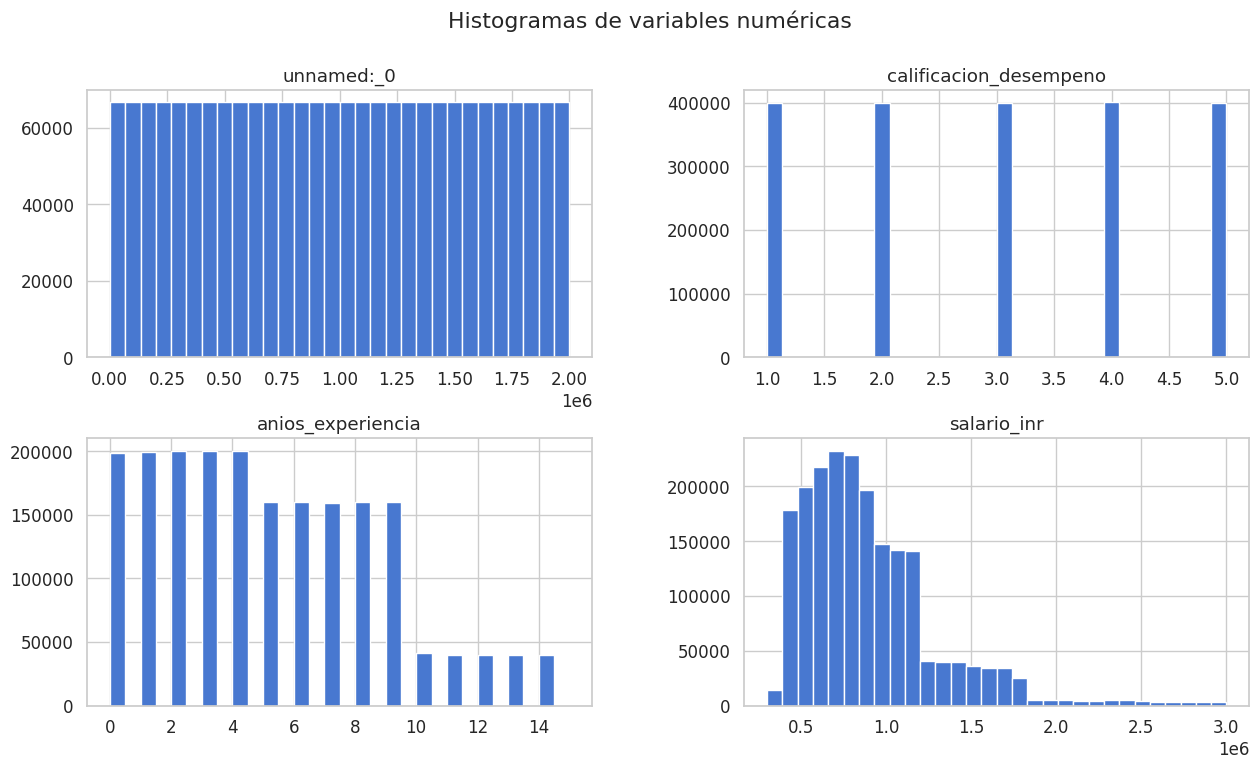

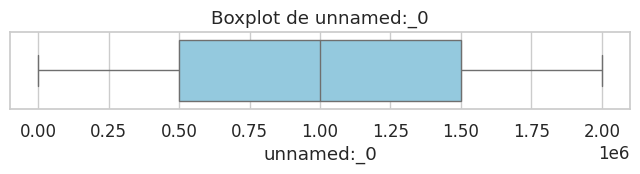

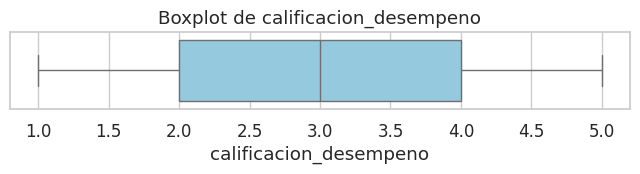

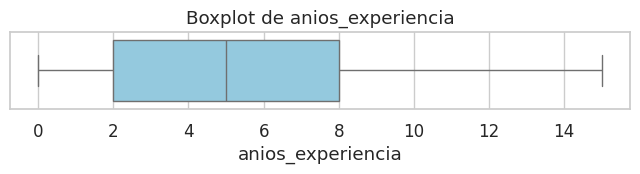

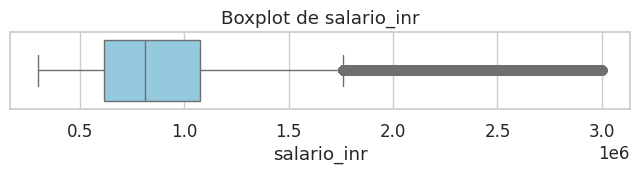

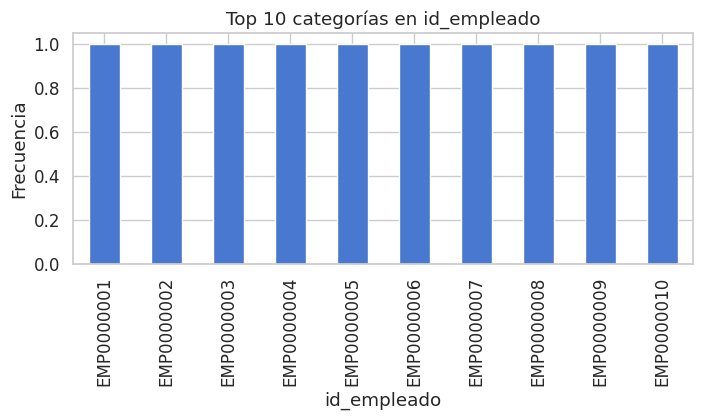

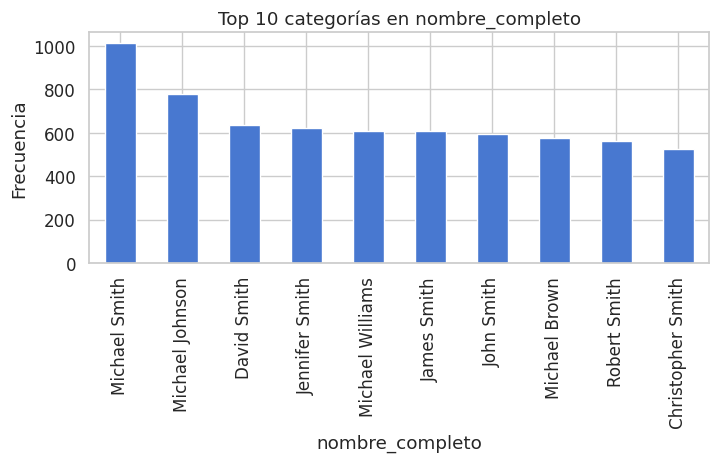

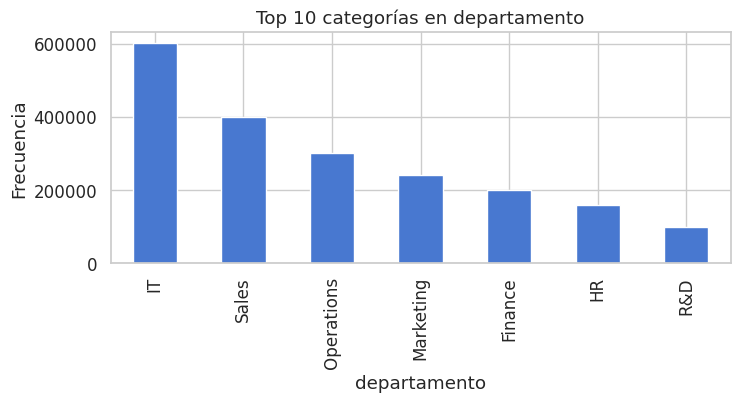

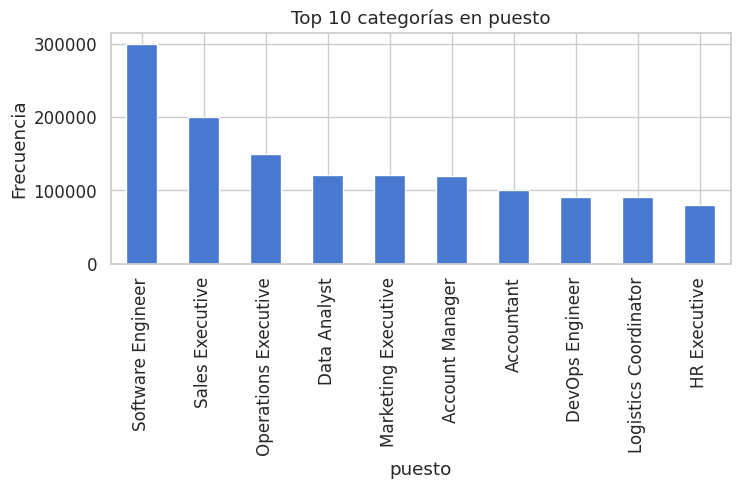

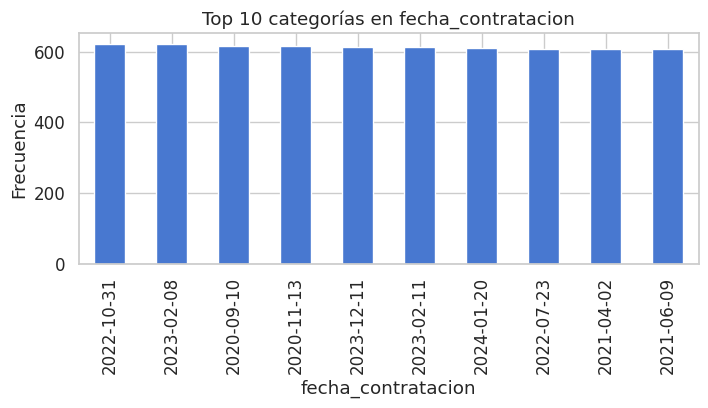

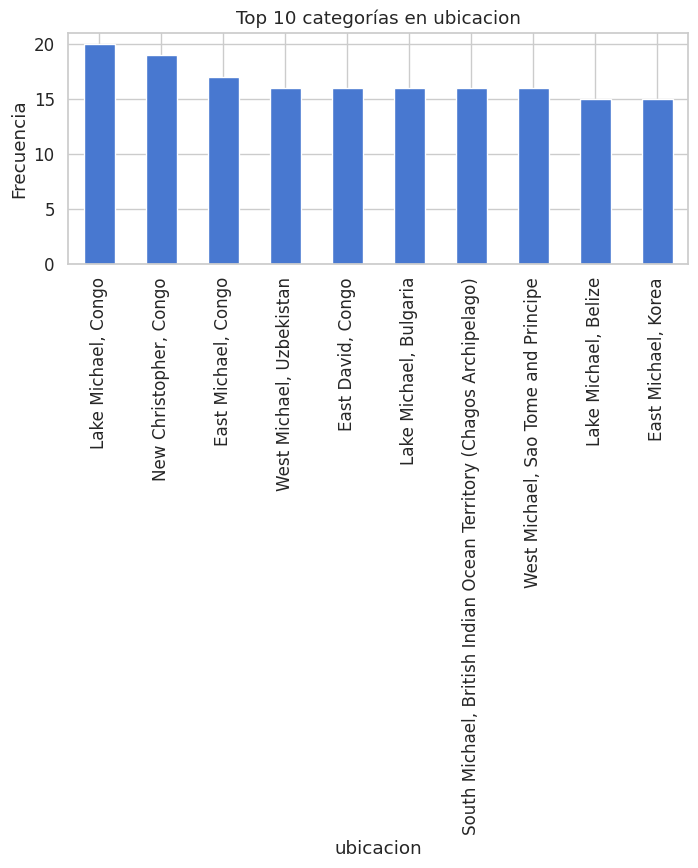

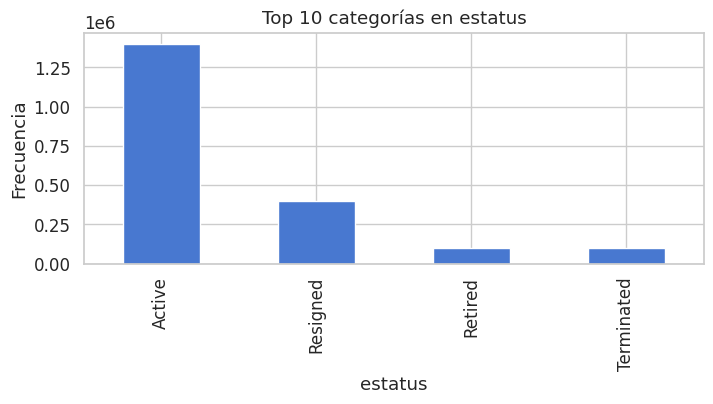

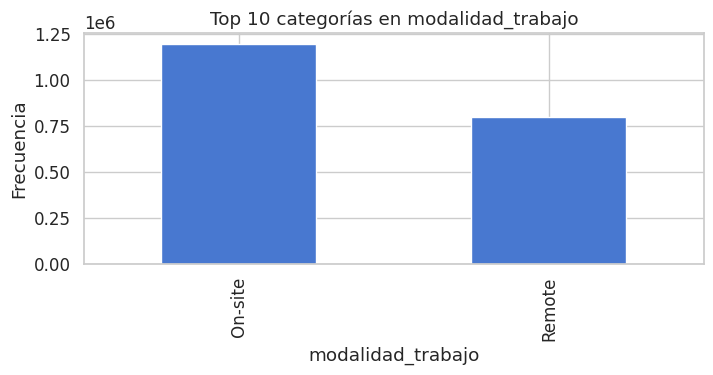

In [9]:
# Histogramas de variables numéricas
num_cols = df.select_dtypes(include=[np.number]).columns
if len(num_cols) > 0:
    df[num_cols].hist(figsize=(15, 8), bins=30)
    plt.suptitle('Histogramas de variables numéricas')
    plt.show()

# Diagramas de caja para detectar outliers
for col in num_cols:
    plt.figure(figsize=(8, 1))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot de {col}')
    plt.show()

# Gráficos de barras para variables categóricas
cat_cols = df.select_dtypes(include=['object', 'string']).columns
for col in cat_cols:
    plt.figure(figsize=(8, 3))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Top 10 categorías en {col}')
    plt.ylabel('Frecuencia')
    plt.show()

## 6. Análisis de correlaciones

Calculamos y visualizamos la matriz de correlación entre variables numéricas usando un mapa de calor.

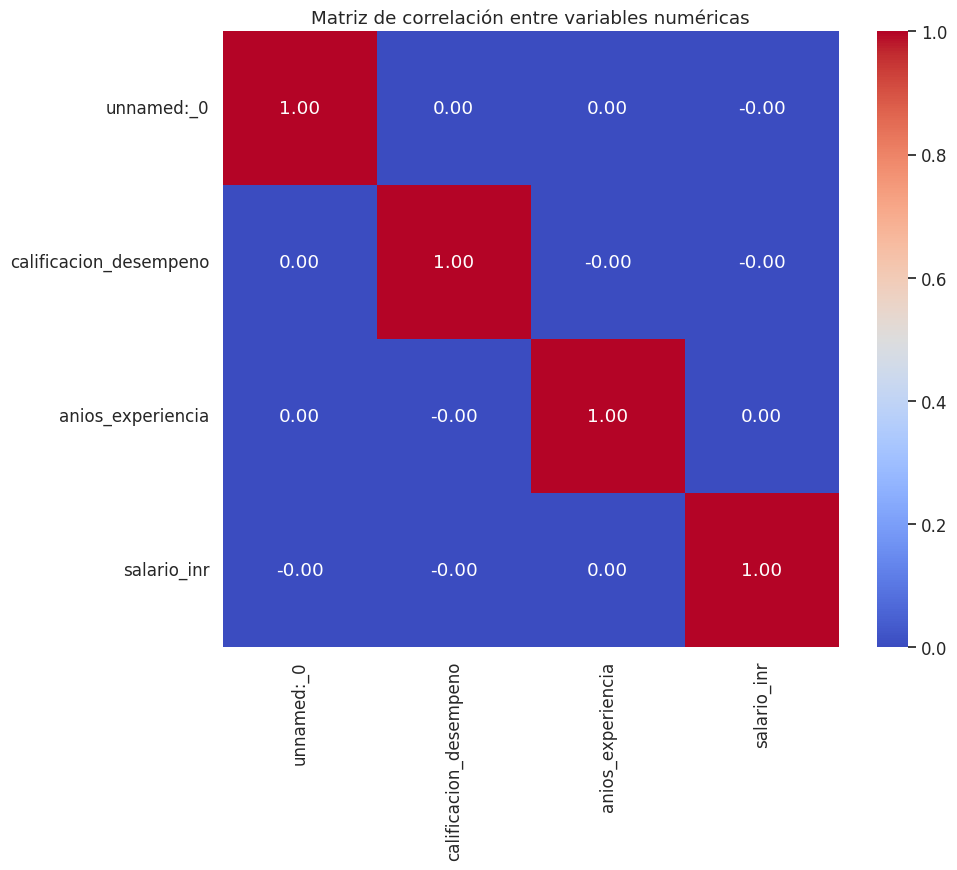

In [10]:
# Matriz de correlación
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()